In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [594]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Sulawesi Tenggara.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       363 non-null    float64       
 2   Tx       363 non-null    float64       
 3   Tavg     361 non-null    float64       
 4   RH_avg   361 non-null    float64       
 5   RR       360 non-null    float64       
 6   ss       363 non-null    float64       
 7   ff_x     363 non-null    float64       
 8   ddd_x    363 non-null    float64       
 9   ff_avg   363 non-null    float64       
 10  ddd_car  363 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-594-48e3c89499d7>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [595]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.8,33.0,8888.0,28.6
1,2023-02-01,25.2,34.6,0.0,29.7
2,2023-03-01,25.1,33.0,0.0,28.9
3,2023-04-01,25.2,31.0,0.2,28.0
4,2023-05-01,24.8,34.5,0.0,29.3
...,...,...,...,...,...
360,2023-12-16,26.0,32.2,10.7,28.4
361,2023-12-17,25.4,34.0,10.3,27.6
362,2023-12-18,24.5,32.7,84.1,28.7
363,2023-12-19,25.0,34.2,8888.0,28.6


In [596]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [597]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [598]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [599]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.8,33.0,0.0,28.6
1,31,31,2023-01-02,24.2,29.4,2.9,26.1
2,59,60,2023-01-03,24.6,31.7,17.3,27.3
3,90,92,2023-01-04,24.6,32.4,29.0,27.0
4,120,123,2023-01-05,25.6,32.0,0.0,28.7
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,26.0,32.2,10.7,28.4
350,350,361,2023-12-17,25.4,34.0,10.3,27.6
351,351,362,2023-12-18,24.5,32.7,84.1,28.7
352,352,363,2023-12-19,25.0,34.2,0.0,28.6


In [600]:
#cek null
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         2
Tx         2
RR         5
Tavg       4
dtype: int64

In [601]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       2
dtype: int64

In [602]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

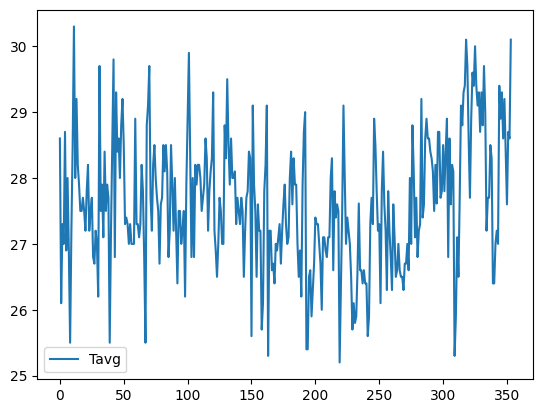

In [603]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

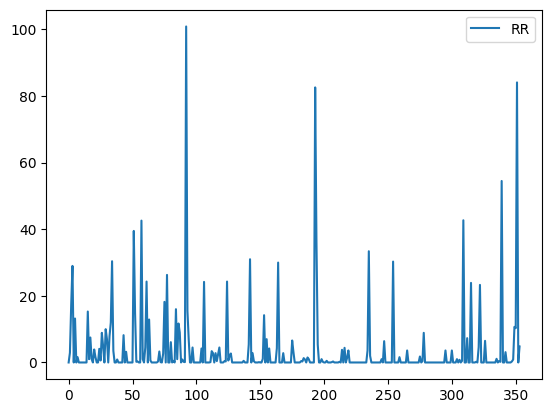

In [604]:
#plotting tavg
df1[['RR']].plot()

In [605]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.8,33.0,0.0,28.6,29.4,26.1,2.9
1,31,31,2023-01-02,24.2,29.4,2.9,26.1,31.7,27.3,17.3
2,59,60,2023-01-03,24.6,31.7,17.3,27.3,32.4,27.0,29.0
3,90,92,2023-01-04,24.6,32.4,29.0,27.0,32.0,28.7,0.0
4,120,123,2023-01-05,25.6,32.0,0.0,28.7,30.9,26.9,13.2
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,26.0,32.2,10.7,28.4,34.0,27.6,10.3
350,350,361,2023-12-17,25.4,34.0,10.3,27.6,32.7,28.7,84.1
351,351,362,2023-12-18,24.5,32.7,84.1,28.7,34.2,28.6,0.0
352,352,363,2023-12-19,25.0,34.2,0.0,28.6,34.5,30.1,4.8


In [606]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,28.6,26.1,2.9
1,2.9,26.1,27.3,17.3
2,17.3,27.3,27.0,29.0
3,29.0,27.0,28.7,0.0
4,0.0,28.7,26.9,13.2
...,...,...,...,...
349,10.7,28.4,27.6,10.3
350,10.3,27.6,28.7,84.1
351,84.1,28.7,28.6,0.0
352,0.0,28.6,30.1,4.8


In [607]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,28.6,26.1,2.9
1,2.9,26.1,27.3,17.3
2,17.3,27.3,27.0,29.0
3,29.0,27.0,28.7,0.0
4,0.0,28.7,26.9,13.2
...,...,...,...,...
348,0.9,29.2,28.4,10.7
349,10.7,28.4,27.6,10.3
350,10.3,27.6,28.7,84.1
351,84.1,28.7,28.6,0.0


In [608]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [609]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,28.6,26.1,2.9,0
1,2.9,26.1,27.3,17.3,1
2,17.3,27.3,27.0,29.0,2
3,29.0,27.0,28.7,0.0,3
4,0.0,28.7,26.9,13.2,4
...,...,...,...,...,...
348,0.9,29.2,28.4,10.7,348
349,10.7,28.4,27.6,10.3,349
350,10.3,27.6,28.7,84.1,350
351,84.1,28.7,28.6,0.0,351


In [610]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [611]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [612]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [613]:
X_test

,Indeks,Tavg
282,282,27.3
283,283,29.2
284,284,27.4
285,285,27.6
286,286,28.6
...,...,...
348,348,29.2
349,349,28.4
350,350,27.6
351,351,28.7


In [614]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.06444685, 27.63482491, 27.09000609, 27.1479964 , 27.44711035,
       27.53524112, 27.44252914, 27.44023853, 27.37766701, 27.34523595,
       27.28266443, 27.09953108, 27.30822367, 27.12894351, 27.45434474,
       27.45205413, 27.14835896, 27.17620881, 27.38490139, 27.17162759,
       27.35017972, 27.4985914 , 26.86335121, 27.40358881, 27.09989364,
       27.27844577, 27.24601471, 26.39979133, 26.57834346, 26.93773833,
       26.75460498, 27.11399985, 27.53367563, 27.44096365, 27.58937533,
       27.61722517, 27.82591776, 27.70306533, 27.3692297 , 27.09567499,
       27.45506986, 27.66376244, 27.60119092, 27.77974305, 27.59660971,
       27.50389773, 27.56188804, 27.37875469, 27.55730682, 27.40431393,
       27.67328743, 27.46001363, 26.91519481, 27.06360649, 27.06131588,
       27.30014892, 27.2375774 , 26.66261812, 26.66032752, 26.83887965,
       26.89686995, 26.83429843, 27.55537877, 27.40238589, 27.5206571 ,
       27.3073833 , 27.48593543, 27.24252118, 26.99910692, 27.32

In [615]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.1928304606419442 1.871190840868203


In [616]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,27.3
283,283,29.2
284,284,27.4
285,285,27.6
286,286,28.6
...,...,...
348,348,29.2
349,349,28.4
350,350,27.6
351,351,28.7


In [617]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.064447
283,27.634825
284,27.090006
285,27.147996
286,27.447110
...,...
348,27.485935
349,27.242521
350,26.999107


In [618]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-618-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,28.6,NaN
1,26.1,NaN
2,27.3,NaN
3,27.0,NaN
4,28.7,NaN
...,...,...
348,29.2,27.485935
349,28.4,27.242521
350,27.6,26.999107
351,28.7,27.328361


<Axes: >

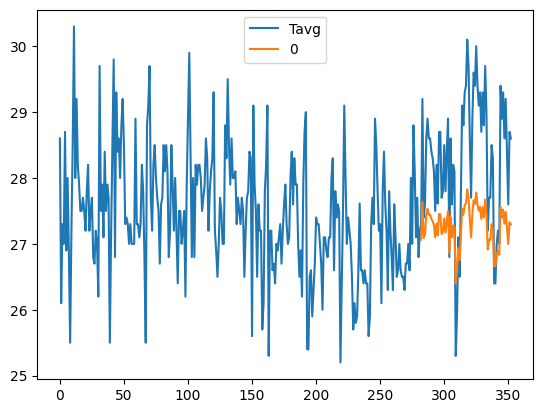

In [619]:
kan.plot()

In [620]:
new_data = [[354, 28.6],[355,28.6],[356,28.6],[357,28.6],[358,28.6],[359,28.6],[360,28.6]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.29134905, 27.28905844, 27.28676784, 27.28447723, 27.28218662,
       27.27989601, 27.27760541])

In [622]:
kan.to_json('Prediksi Sulawesi Tenggara.json')